In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
sns_general_width   = 16
sns_general_height  = 8
sns.set(rc={'figure.figsize':(sns_general_width, sns_general_height)})

Text(0.5, 0, 'Adjusted R-Squared for Regressions with Stringency Sub-Indices and New Case Counts')

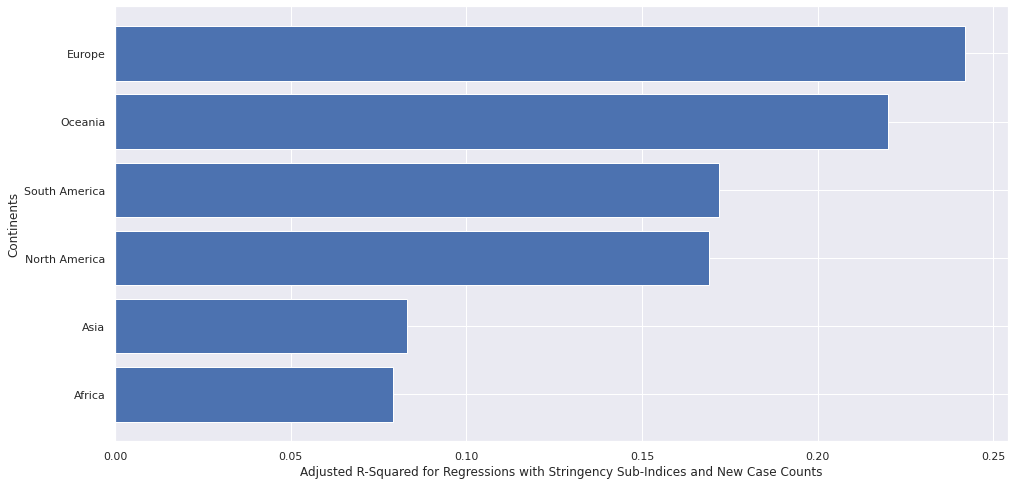

In [3]:
plt.barh(
    list(reversed(['Europe','Oceania', 'South America', 'North America', 'Asia','Africa'])), 
    list(reversed([0.242, 0.220,  0.172, 0.169, 0.083, 0.079]))
)
# plt.xticks(rotation = 45)
plt.ylabel('Continents')
plt.xlabel('Adjusted R-Squared for Regressions with Stringency Sub-Indices and New Case Counts')

Text(0, 0.5, 'Compliance (%)')

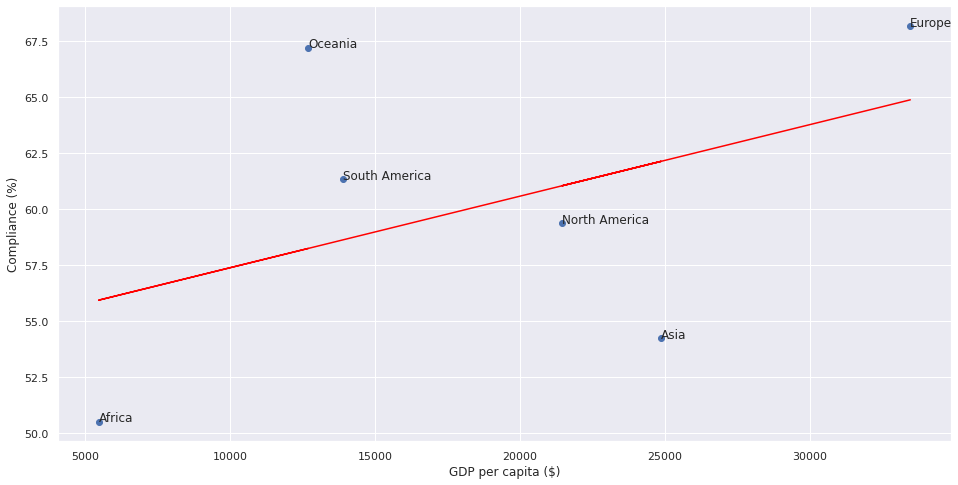

In [4]:
continents = ['Europe', 'North America', 'Asia', 'South America', 'Africa', 'Oceania']
gdps = np.array([33453.45, 21455.54, 24863.81, 13886.75, 5477.77, 12699.64])
# compliances = 100 * np.array([0.981, 0.958, 0.944, 0.939, 0.927, 0.897]) # Values from old compliance calculation method
compliances = np.array([68.171915, 59.367313, 54.249024, 61.350557, 50.515747, 67.218028])
plt.scatter(gdps, compliances)
for i, txt in enumerate(continents):
    plt.annotate(txt, (gdps[i], compliances[i]), clip_on=True)

a, b = np.polyfit(gdps, compliances, 1)
plt.plot(gdps, a*gdps+b, color='red')
plt.xlabel('GDP per capita ($)')
plt.ylabel('Compliance (%)')

In [5]:
temp = pd.read_csv('temp.csv')
temp

,A,B,C,D,E,F
0,1.19,26.31,0.90,6.05,NaN,NaN
1,6.35,79.78,20.31,15.60,97.13,NaN
2,3.70,74.29,15.95,14.32,97.29,NaN
3,1.99,66.96,11.89,20.17,95.05,NaN
4,0.92,52.88,7.04,83.51,70.57,98.57
5,1.76,56.69,11.56,129.16,-5.29,65.58
6,1.09,45.00,1.83,199.01,93.92,87.99
7,0.36,46.29,5.46,386.21,50.80,85.38


In [6]:
for col in temp.columns:
    temp[col] = temp[col].pct_change()*100 if col=='D' else temp[col].diff()

In [7]:
temp

,A,B,C,D,E,F
0,NaN,NaN,NaN,NaN,NaN,NaN
1,5.16,53.47,19.41,157.851240,NaN,NaN
2,-2.65,-5.49,-4.36,-8.205128,0.16,NaN
3,-1.71,-7.33,-4.06,40.851955,-2.24,NaN
4,-1.07,-14.08,-4.85,314.030739,-24.48,NaN
5,0.84,3.81,4.52,54.664112,-75.86,-32.99
6,-0.67,-11.69,-9.73,54.080211,99.21,22.41
7,-0.73,1.29,3.63,94.065625,-43.12,-2.61


In [8]:
temp.to_csv('temp_out.csv')